# **Import libraries**

In [ ]:
!pip install dash plotly pandas scikit-learn


In [ ]:
!pip install dash
!pip install pyngrok

# **Import additional libraries**

In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

# **Load the dataset**

In [ ]:
data = pd.read_csv("/content/data.csv")
#genre_data = pd.read_csv('/content/data_w_genres.csv')
year_data = pd.read_csv('/content/data_by_year.csv')

# **Print the Dataset**

In [ ]:
data.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

# **Data Preprocessing : Handeling Missing values**

In [ ]:

missing_values = data.isnull().sum()

missing_values_df = missing_values.reset_index()

missing_values_df.columns = ['Column', 'Missing Values']

print(missing_values_df)


              Column  Missing Values
0            valence               0
1               year               0
2       acousticness               0
3            artists               0
4       danceability               0
5        duration_ms               0
6             energy               0
7           explicit               0
8                 id               0
9   instrumentalness               0
10               key               0
11          liveness               0
12          loudness               0
13              mode               0
14              name               0
15        popularity               0
16      release_date               0
17       speechiness               0
18             tempo               0


In [ ]:
data.duplicated().sum()

0

# **Count the numbers of columns and rows**

In [ ]:

num_rows = len(data)

num_columns = len(data.columns)

print(f'Number of Rows: {num_rows}')
print(f'Number of Columns: {num_columns}')


Number of Rows: 170653
Number of Columns: 19


# **Data Visualization:Feature Correlation map**

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','popularity']

X, y = data[feature_names], data['year']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(8,6)
visualizer.fit(X, y)
visualizer.show()

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

# **A dashboard for interactive visualization**

In [ ]:
from dash import Dash, html, dash_table, dcc, callback, Output, Input
from pyngrok import ngrok


ngrok.set_auth_token("2ra68T1PexqPW4YHpFxTAE0G2bg_4v1Qyo8uBBzYbqkU3tADr")


app = Dash()


app.layout = html.Div([

    dcc.Dropdown(
        id='scatter-dropdown',
        options=[
            {'label': 'Valence vs. Energy', 'value': 'valence_energy'},
            {'label': 'Acousticness vs. Danceability', 'value': 'acousticness_danceability'},
            {'label': 'Loudness vs. Popularity', 'value': 'loudness_popularity'}
        ],
        value='valence_energy',
        style={'width': '50%'}
    ),

    dcc.Graph(id='scatter-plot')
])


@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('scatter-dropdown', 'value')]
)
def update_scatter(selected_value):
    if selected_value == 'valence_energy':
        fig = px.scatter(data, x='valence', y='energy', title='Valence vs. Energy')
    elif selected_value == 'acousticness_danceability':
        fig = px.scatter(data, x='acousticness', y='danceability', title='Acousticness vs. Danceability')
    elif selected_value == 'loudness_popularity':
        fig = px.scatter(data, x='loudness', y='popularity', title='Loudness vs. Popularity')

    return fig


public_url = ngrok.connect(8040)
print("Dash app is running at:", public_url)

app.run_server(debug=False)


Dash app is running at: NgrokTunnel: "https://8b4a-34-31-121-86.ngrok-free.app" -> "http://localhost:8040"


<IPython.core.display.Javascript object>

# **Data visualization : Histogram**

In [ ]:
data['decade'] = (data['year'] // 10) * 10

count = data.groupby('decade')['year'].count().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='decade', y='year', data=count)

plt.title('Number of Songs Count by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of songs')

plt.show()

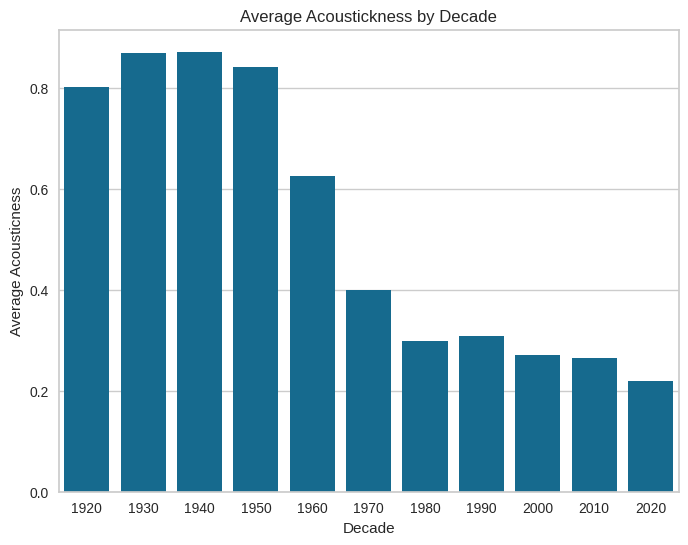

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data['decade'] = (data['year'] // 10) * 10

decade_popularity = data.groupby('decade')['acousticness'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.barplot(x='decade', y='acousticness', data=decade_popularity)

plt.title('Average Acoustickness by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Acousticness')


plt.show()


# **Data Visualization from interactive Dashboard**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

data['decade'] = (data['year'] // 10) * 10

decade_stats = data.groupby('decade').agg(
    average_popularity=('popularity', 'mean'),
    song_count=('year', 'count')
).reset_index()


app = dash.Dash(__name__)


app.layout = html.Div([
    html.H1("Decade vs Popularity/Count of Songs"),


    dcc.Dropdown(
        id='y-axis-dropdown',
        options=[
            {'label': 'Average Popularity', 'value': 'average_popularity'},
            {'label': 'Count of Songs', 'value': 'song_count'}

        ],
        value='average_popularity',
        style={'width': '50%'}
    ),

    dcc.Graph(id='decade-bar-plot'),

#     html.Div([
#     html.H1("Scatter Plot"),
#     # Dropdown menu for selecting scatter plot
#     dcc.Dropdown(
#         id='scatter-dropdown',
#         options=[
#             {'label': 'Valence vs. Energy', 'value': 'valence_energy'},
#             {'label': 'Acousticness vs. Danceability', 'value': 'acousticness_danceability'},
#             {'label': 'Loudness vs. Popularity', 'value': 'loudness_popularity'}
#         ],
#         value='valence_energy',  # Default value
#         style={'width': '50%'}
#     ),

#     # Graph to display the selected scatter plot
#     dcc.Graph(id='scatter-plot')
# ])
    ])


@app.callback(
    Output('decade-bar-plot', 'figure'),
    [Input('y-axis-dropdown', 'value')]
)
def update_graph(y_axis_value):

    fig = go.Figure()


    fig.add_trace(go.Bar(
        x=decade_stats['decade'],
        y=decade_stats[y_axis_value],
        marker_color='indianred' if y_axis_value == 'average_popularity' else 'lightblue',
        name=y_axis_value
    ))


    fig.update_layout(
        title=f'{y_axis_value.replace("_", " ").title()} by Decade',
        xaxis_title="Decade",
        yaxis_title=y_axis_value.replace("_", " ").title(),
        template='plotly_dark'
    )

    return fig

# Step 6: Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# **Draft : Cosine similarity (problem)**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

data1 = data.head(10000)


features = data1[['acousticness', 'danceability', 'energy', 'loudness', 'tempo', 'valence']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


cosine_sim = cosine_similarity(features_scaled)


cosine_sim_df = pd.DataFrame(cosine_sim, index=data1['name'], columns=data1['name'])

def recommend_songs(name, cosine_sim_df, top_n=10):

    similar_songs = cosine_sim_df[name].sort_values(ascending=False).iloc[1:top_n+1]

    return similar_songs

song_name = input("Enter the name of the song you want recommendations for: ")

recommendations = recommend_songs(song_name, cosine_sim_df, top_n=5)

print("Recommended songs:")
print(recommendations)

Enter the name of the song you want recommendations for: Who Am I


KeyError: 'Who Am I'

In [ ]:
data1 = data

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assume 'data1' contains your feature columns: 'acousticness', 'danceability', etc.
features = data1[['acousticness', 'danceability', 'energy', 'loudness', 'tempo', 'valence']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA to reduce the dimensions to 2 components (for example)
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_scaled)

# Now 'features_reduced' contains the reduced 2-dimensional data


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix


dataa = data


features = dataa[['acousticness', 'danceability', 'energy', 'loudness', 'tempo', 'valence']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


pca = PCA(n_components=6)
features_reduced = pca.fit_transform(features_scaled)


features_sparse = csr_matrix(features_reduced)


knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=10)
knn.fit(features_sparse)


def recommend_song(song_name, data, knn_model):

    song_idx = dataa[data['name'] == song_name].index[0]


    song_features = features_sparse[song_idx].reshape(1, -1)


    distances, indices = knn_model.kneighbors(song_features, n_neighbors=11)


    recommended_song_names = dataa.iloc[indices.flatten()[1:]]['name'].tolist()

    return recommended_song_names


song_to_recommend = "Little Rock"
recommended_songs = recommend_song(song_to_recommend, data, knn)

print(f"Recommended songs similar to '\n{song_to_recommend}':")
print(recommended_songs)


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix


dataa = data
song_name=['Little Rock', 'Are You With Me', 'Earth Song', 'Earth Song - Radio Edit', 'Please Forgive Me', 'Pagan Poetry']

features = dataa[['acousticness', 'danceability', 'energy', 'loudness', 'tempo', 'valence']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


pca = PCA(n_components=6)
features_reduced = pca.fit_transform(features_scaled)


features_sparse = csr_matrix(features_reduced)


knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=10)
knn.fit(features_sparse)


def recommend_song(song_name, data, knn_model):

    song_idx = dataa[data['name'] == song_name].index[0]


    song_features = features_sparse[song_idx].reshape(1, -1)


    distances, indices = knn_model.kneighbors(song_features, n_neighbors=11)


    recommended_song_names = dataa.iloc[indices.flatten()[1:]]['name'].tolist()

    return recommended_song_names


#song_to_recommend = "Who Am I"
#recommended_songs = recommend_song(song_to_recommend, data, knn)


app = dash.Dash(__name__)

app.layout = html.Div([

       html.Div([
        html.H1("Music Recommendation System",
                style={
                    'textAlign': 'center',
                    'color': 'white',
                    'padding': '20px',
                    'fontFamily': 'Arial, sans-serif'
                }),


        html.Div([
            dcc.Dropdown(
                id='song-dropdown',
                options=[{'label': song, 'value': song} for song in song_name],
                #options=[{'label': song, 'value': song} for song in dataa['name']],
                value='Earth Song',
                style={
                    'width': '300px',
                    'margin': '0 auto',
                    'fontFamily': 'Arial, sans-serif'
                }
            )
        ], style={'display': 'flex', 'justifyContent': 'center', 'marginBottom': '20px'}),


        html.Div(id='recommendations-output',
                 style={
                     'textAlign': 'center',
                     'color': 'white',
                     'fontFamily': 'Arial, sans-serif'
                 })
    ], style={
        'backgroundColor': 'rgba(0,0,0,0.7)',
        'maxWidth': '600px',
        'margin': '0 auto',
        'borderRadius': '10px',
        'padding': '20px'
    })
])


@app.callback(
    Output('recommendations-output', 'children'),
    [Input('song-dropdown', 'value')]
)
def update_recommendations(selected_song):

    recommended_songs = recommend_song(selected_song, dataa, knn)

    song_list = [html.Div(f"{i + 1}. {song}") for i, song in enumerate(recommended_songs)]

    return [html.Div(f"Recommended songs for '{selected_song}':"), *song_list]

if __name__ == '__main__':
    app.run_server(debug=True)
